# Run some tracking tests 

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='white')
%config InlineBackend.figure_format = 'retina'

## Have a look at the output .csv

In [30]:
csv_fname = r"C:\CODE\2P_tracking\Tracker\Current version\x64\Release\export\Tracking_2017-11-30_11-34-23.csv"
csv_fname = "/".join(csv_fname.split("\\"))

In [31]:
tracking = pd.read_csv(csv_fname,header = 3)

In [32]:
tracking.head(2)

,frame,cam_timestamp,sys_timestamp,green_x,green_y,red_x,red_y
0,1,4636702862253,777687639181428,318.286,193.857,284.667,180.333
1,2,4636722879135,777687795622554,318.417,194.083,284.667,180.333


In [33]:
len(tracking)

76154

We get a **cam_timestamp** and **sys_timestamp** out. The cam_timestamp is the actual frame timestamp for every acquired frame. The sys_timestamp is the timestamp of every processing loop (for every grabbed frame). So the sys_timestamp reflects the actual processing time for every frame. That has a lot of jitter depending on how well your computer can cope with the incoming data.  

In [34]:
tracking["difference"] = np.append(0,np.diff(tracking.cam_timestamp))
tracking["difference_sys"] = np.append(0,np.diff(tracking.sys_timestamp))

In [35]:
tracking["difference_sec"] = tracking["difference"]/1000000000 # Gigaherz clock!
tracking["difference_sys_sec"] = tracking["difference_sys"]/1000000000

In [36]:
tracking.head()

,frame,cam_timestamp,sys_timestamp,green_x,green_y,red_x,red_y,difference,difference_sys,difference_sec,difference_sys_sec
0,1,4636702862253,777687639181428,318.286,193.857,284.667,180.333,0,0,0.000000,0.000000
1,2,4636722879135,777687795622554,318.417,194.083,284.667,180.333,20016882,156441126,0.020017,0.156441
2,3,4636742897340,777687812246637,318.615,194.385,285.000,180.500,20018205,16624083,0.020018,0.016624
3,4,4636762909848,777687828057738,318.643,194.714,285.333,180.667,20012508,15811101,0.020013,0.015811
4,5,4636782926460,777687842781535,319.000,195.286,285.500,181.000,20016612,14723797,0.020017,0.014724


### Plot cam_timestamp and sys_timestamp differences

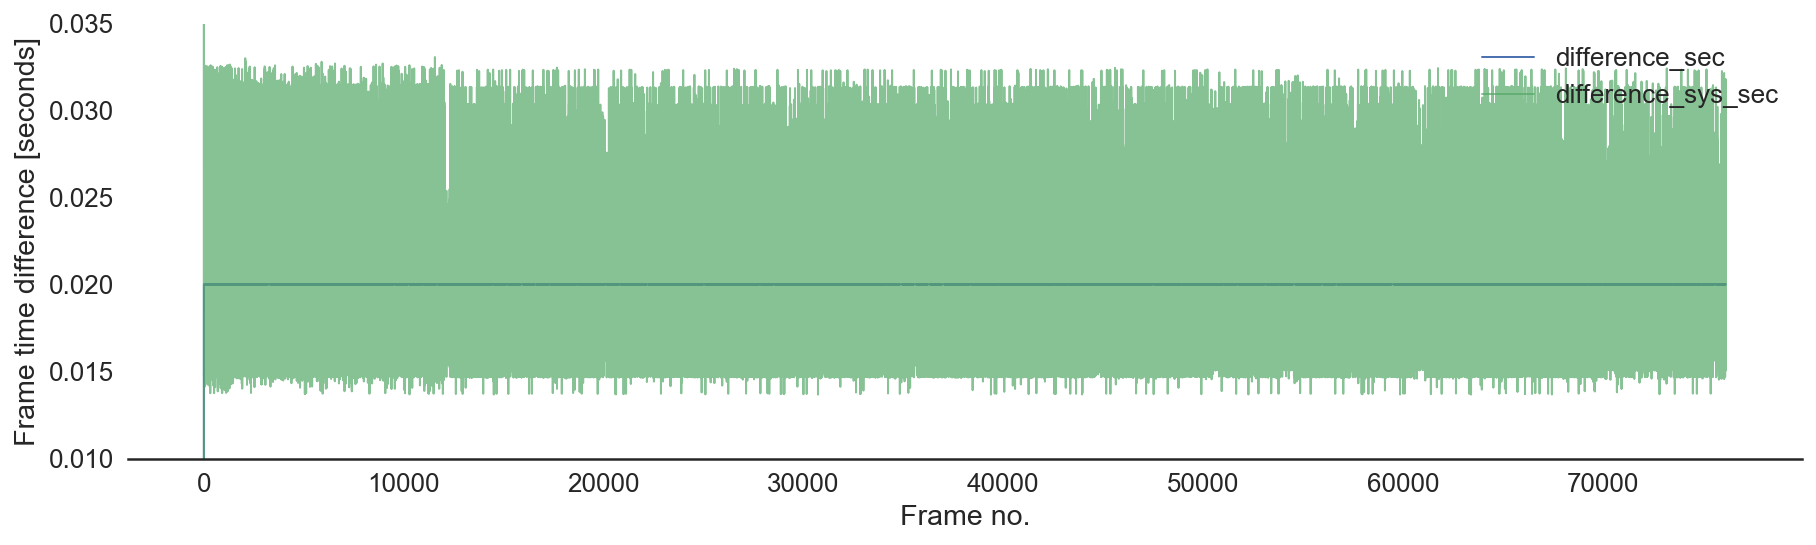

In [44]:
figure = plt.figure(figsize=(15,4))
ax = figure.add_subplot(111)
ax.plot(tracking.difference_sec,lw=1,label="difference_sec")
ax.plot(tracking.difference_sys_sec,lw=1,label="difference_sys_sec",alpha=.7)
#ax.axhline(y=0.025,lw=1,color='r')
#ax.set_xlim(0,240)
ax.set_ylim(0.01,0.035)
ax.set_ylabel("Frame time difference [seconds]")
ax.set_xlabel("Frame no.")
plt.legend()
sns.despine(left=True)
plt.show();

### ... zoom in 

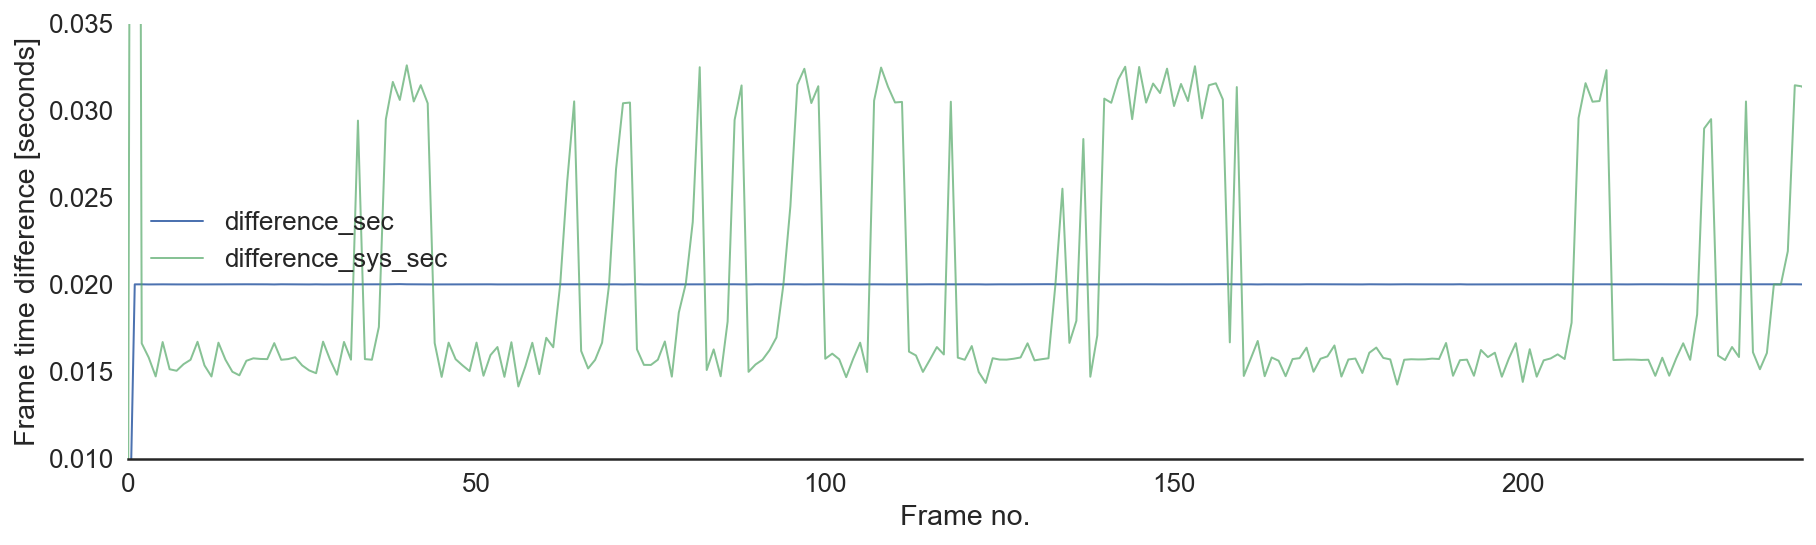

In [45]:
figure = plt.figure(figsize=(15,4))
ax = figure.add_subplot(111)
ax.plot(tracking.difference_sec,lw=1,label="difference_sec")
ax.plot(tracking.difference_sys_sec,lw=1,label="difference_sys_sec",alpha=.7)
#ax.axhline(y=0.025,lw=1,color='r')
ax.set_xlim(0,240)
ax.set_ylim(0.01,0.035)
ax.set_ylabel("Frame time difference [seconds]")
ax.set_xlabel("Frame no.")
plt.legend()
sns.despine(left=True)
plt.show();

The processor needs some time at the start to "get going", but then catches up on my machine.

In [39]:
tracking.describe()

,frame,cam_timestamp,sys_timestamp,green_x,green_y,red_x,red_y,difference,difference_sys,difference_sec,difference_sys_sec
count,76154.000000,7.615400e+04,7.615400e+04,76154.000000,76154.000000,76154.000000,76154.000000,7.615400e+04,7.615400e+04,76154.000000,76154.000000
mean,38077.500000,5.398900e+12,7.784498e+14,315.474795,204.120928,249.459242,162.855907,2.001726e+07,2.001722e+07,0.020017,0.020017
std,21983.910537,4.400634e+11,4.400541e+11,51.703503,48.982087,111.532724,80.528613,7.260166e+04,4.100216e+06,0.000073,0.004100
min,1.000000,4.636703e+12,7.776876e+14,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,19039.250000,5.017801e+12,7.780687e+14,320.286000,194.833000,291.000000,178.333000,2.001632e+07,1.666714e+07,0.020016,0.016667
50%,38077.500000,5.398900e+12,7.784498e+14,322.455000,204.000000,294.500000,181.500000,2.001783e+07,1.998665e+07,0.020018,0.019987
75%,57115.750000,5.779998e+12,7.788309e+14,325.000000,206.182000,296.667000,190.500000,2.002034e+07,2.092197e+07,0.020020,0.020922
max,76154.000000,6.161097e+12,7.792120e+14,489.737000,498.286000,493.500000,470.750000,2.003036e+07,1.564411e+08,0.020030,0.156441


## Plot trace

This needs filtering for (0,0) values for either LED. If both coordinates of one LED are zero the likelihood that tracing was unsuccessful is very high (0,0 is the default value).

In [42]:
tracking.columns

Index(['frame', 'cam_timestamp', 'sys_timestamp', 'green_x', 'green_y',
       'red_x', 'red_y', 'difference', 'difference_sys', 'difference_sec',
       'difference_sys_sec'],
      dtype='object')

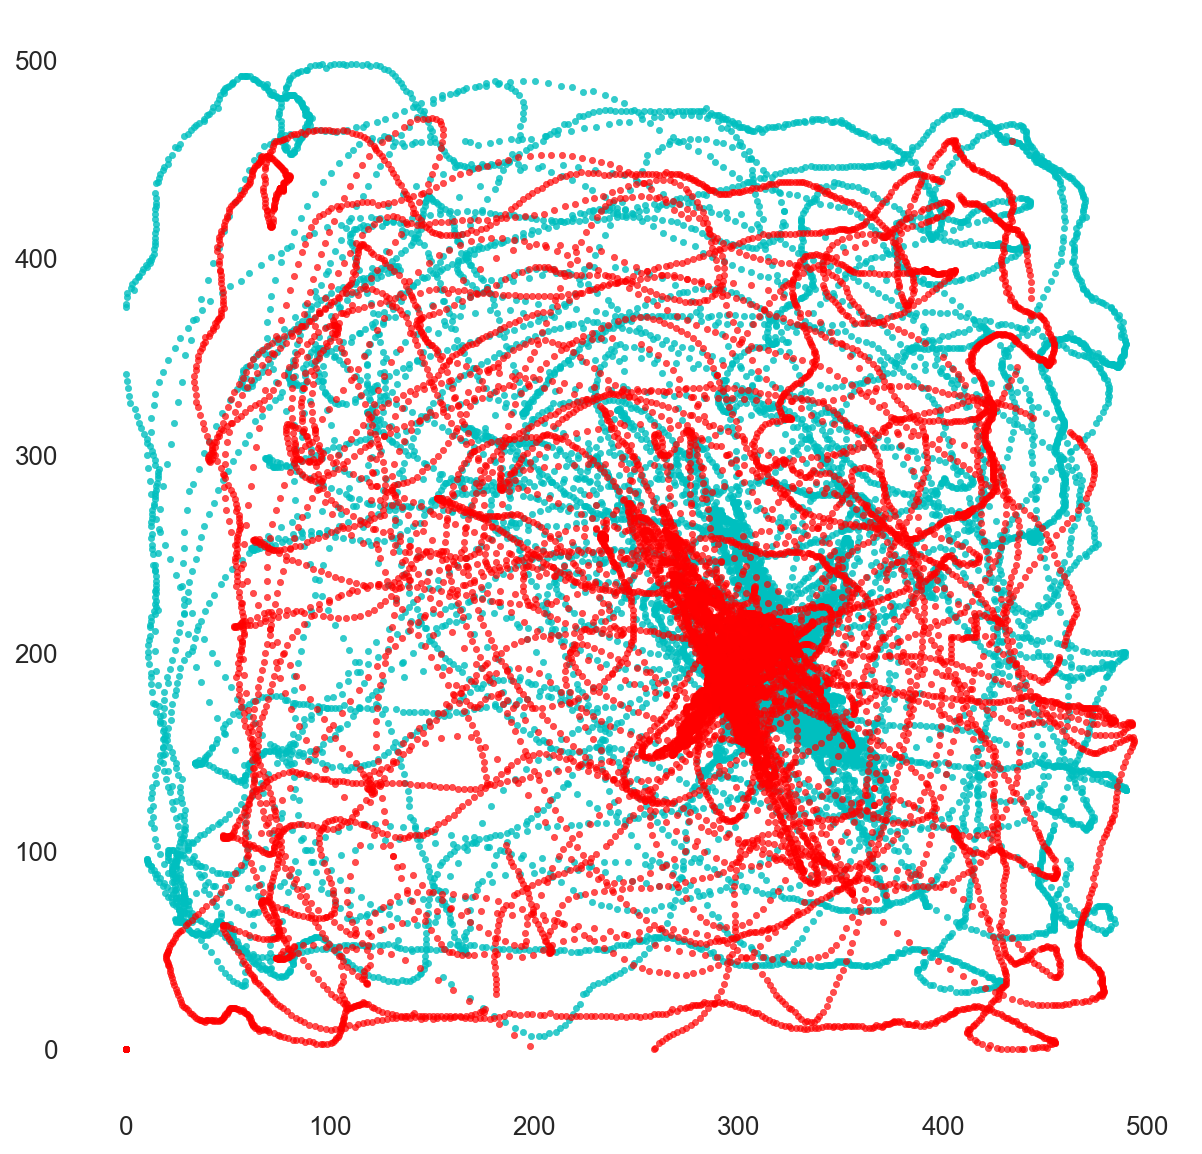

In [43]:
sns.set(font_scale=1.3,style="white")
figure = plt.figure(figsize=(10,10))
ax = figure.add_subplot(111)
ax.scatter(tracking.green_x,tracking.green_y,c='c',s=10,alpha=.8)
ax.scatter(tracking.red_x,tracking.red_y,c='r',s=10,alpha=.7)
sns.despine(left=True,bottom=True)
plt.show()